<a href="https://colab.research.google.com/github/Ishraqalibon/Lok-Sabha-Election-Results-2024-India-analysis/blob/main/Lok_Sabha_Election_Results_2024_India_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
data=pd.read_csv('/content/election_results_2024.csv')
data.head(5)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [ ]:
data.isna().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64

In [ ]:
data.shape

(543, 8)

In [ ]:
data[data['Trailing Candidate'].isna()]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,-,Uncontested


In [ ]:
data.nunique()

Constituency          541
Const. No.             80
Leading Candidate     542
Leading Party          42
Trailing Candidate    542
Trailing Party         42
Margin                543
Status                  2
dtype: int64

In [ ]:
data.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

In [ ]:
data['Trailing Candidate']=data['Trailing Candidate'].fillna('NoName')

In [ ]:
data[data['Trailing Candidate'].isna()]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status


In [ ]:
data['Trailing Party']=data['Trailing Party'].fillna('NoName')

In [ ]:
data.loc[493]

Constituency                                   Surat
Const. No.                                        24
Leading Candidate     MUKESHKUMAR CHANDRAKAANT DALAL
Leading Party                 Bharatiya Janata Party
Trailing Candidate                            NoName
Trailing Party                                NoName
Margin                                             -
Status                                   Uncontested
Name: 493, dtype: object

In [ ]:
data.dtypes

Constituency          object
Const. No.             int64
Leading Candidate     object
Leading Party         object
Trailing Candidate    object
Trailing Party        object
Margin                object
Status                object
dtype: object

In [ ]:
data[data['Margin']=='-']

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NoName,NoName,-,Uncontested


In [ ]:
data['Margin']=data['Margin'].replace('-',0)

In [ ]:
data['Margin']=data['Margin'].astype(int)

In [ ]:
data.dtypes

Constituency          object
Const. No.             int64
Leading Candidate     object
Leading Party         object
Trailing Candidate    object
Trailing Party        object
Margin                 int64
Status                object
dtype: object

In [ ]:
data['Status'].value_counts()

Status
Result Declared    542
Uncontested          1
Name: count, dtype: int64

In [ ]:
parties=data['Trailing Party'].value_counts()
parties

Trailing Party
Indian National Congress                                    167
Bharatiya Janata Party                                      153
All India Anna Dravida Munnetra Kazhagam                     24
Samajwadi Party                                              24
Biju Janata Dal                                              21
Yuvajana Sramika Rythu Congress Party                        21
Rashtriya Janata Dal                                         18
Communist Party of India (Marxist)                           17
All India Trinamool Congress                                 13
Aam Aadmi Party                                              13
Shiv Sena (Uddhav Balasaheb Thackrey)                        10
Shiv Sena                                                     8
Independent                                                   5
Communist Party of India                                      4
Janata Dal (United)                                           4
Nationalist Congress Part

In [ ]:
data.head(5)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


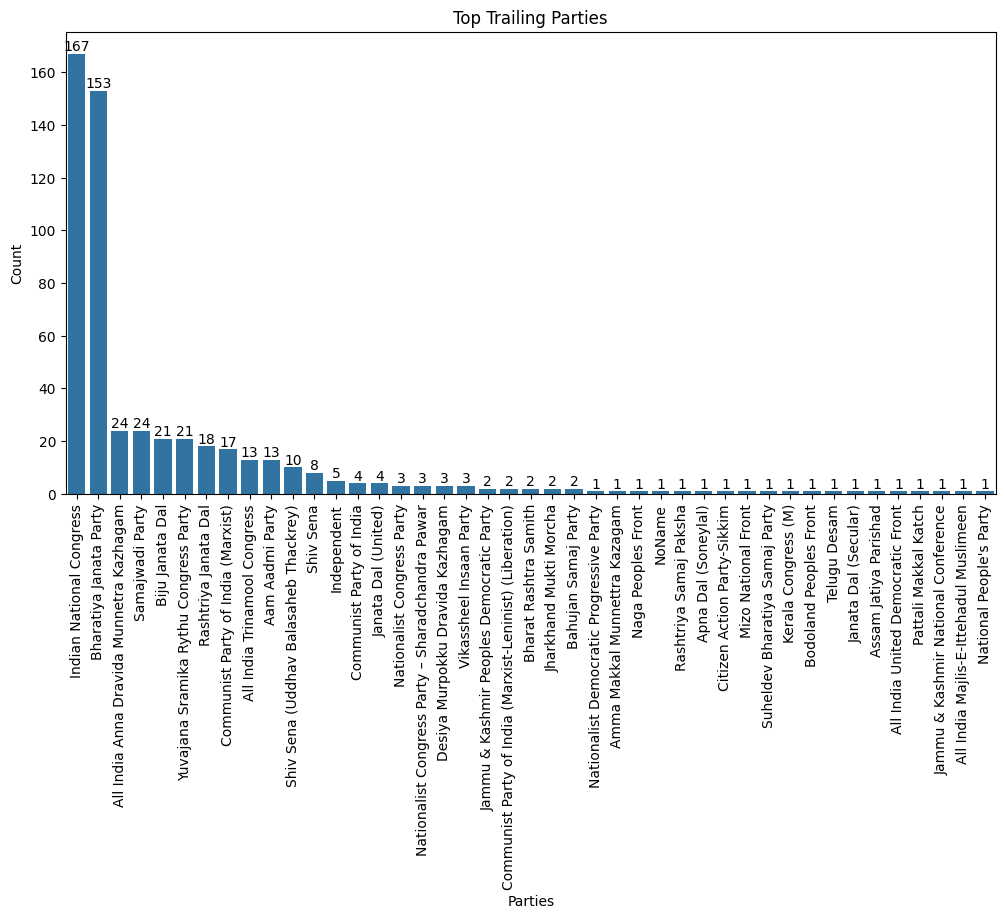

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=parties.index,y=parties.values)
plt.xticks(rotation=90)
plt.title('Top Trailing Parties')
plt.xlabel('Parties')
plt.ylabel('Count')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

In [ ]:
top_martin=data.sort_values(by='Margin',ascending=False).head(5)
top_martin

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
221,INDORE,26,SHANKAR LALWANI,Bharatiya Janata Party,SANJAY S/O LAKSHMAN SOLANKI,Bahujan Samaj Party,1175092,Result Declared
157,Dhubri,2,RAKIBUL HUSSAIN,Indian National Congress,MOHAMMED BADRUDDIN AJMAL,All India United Democratic Front,1012476,Result Declared
525,VIDISHA,18,SHIVRAJ SINGH CHOUHAN,Bharatiya Janata Party,PRATAPBHANU SHARMA,Indian National Congress,821408,Result Declared
384,Navsari,25,C R PATIL,Bharatiya Janata Party,NAISHADHBHAI BHUPATBHAI DESAI,Indian National Congress,773551,Result Declared
186,Gandhinagar,6,AMIT SHAH,Bharatiya Janata Party,SONAL RAMANBHAI PATEL,Indian National Congress,744716,Result Declared


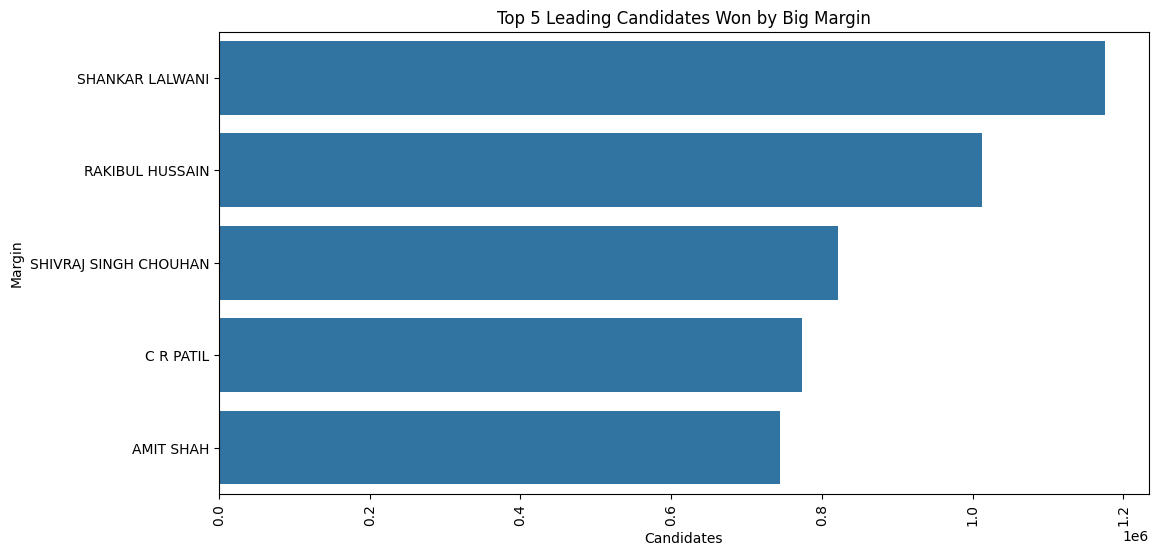

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=top_martin['Margin'].head(5),y=top_martin['Leading Candidate'].head(5),orient='h')
plt.xticks(rotation=90)
plt.title('Top 5 Leading Candidates Won by Big Margin')
plt.xlabel('Candidates')
plt.ylabel('Margin')
plt.show()

In [ ]:
top_parties=data['Leading Party'].value_counts().rename_axis('Parties').reset_index(name='Count')
top_parties

,Parties,Count
0,Bharatiya Janata Party,240
1,Indian National Congress,99
2,Samajwadi Party,37
3,All India Trinamool Congress,29
4,Dravida Munnetra Kazhagam,22
5,Telugu Desam,16
6,Janata Dal (United),12
7,Shiv Sena (Uddhav Balasaheb Thackrey),9
8,Nationalist Congress Party – Sharadchandra Pawar,8
9,Shiv Sena,7


In [ ]:
other_parites=0
counts=list(top_parties['Count'])
for i in range(len(counts)):
  if counts[i]<20:
    other_parites+=counts[i]
other_parites


116

In [ ]:
df=pd.DataFrame({'Parties':['Other Parties'],
                 'Count':[other_parites]})

In [ ]:
top_parties=pd.concat([top_parties,df],ignore_index=True)
top_parties

,Parties,Count
0,Bharatiya Janata Party,240
1,Indian National Congress,99
2,Samajwadi Party,37
3,All India Trinamool Congress,29
4,Dravida Munnetra Kazhagam,22
5,Telugu Desam,16
6,Janata Dal (United),12
7,Shiv Sena (Uddhav Balasaheb Thackrey),9
8,Nationalist Congress Party – Sharadchandra Pawar,8
9,Shiv Sena,7


In [ ]:
top_parties=top_parties[top_parties['Count']>20]
top_parties

,Parties,Count
0,Bharatiya Janata Party,240
1,Indian National Congress,99
2,Samajwadi Party,37
3,All India Trinamool Congress,29
4,Dravida Munnetra Kazhagam,22
42,Other Parties,116


In [ ]:
top_parties['Count'].sum()

543

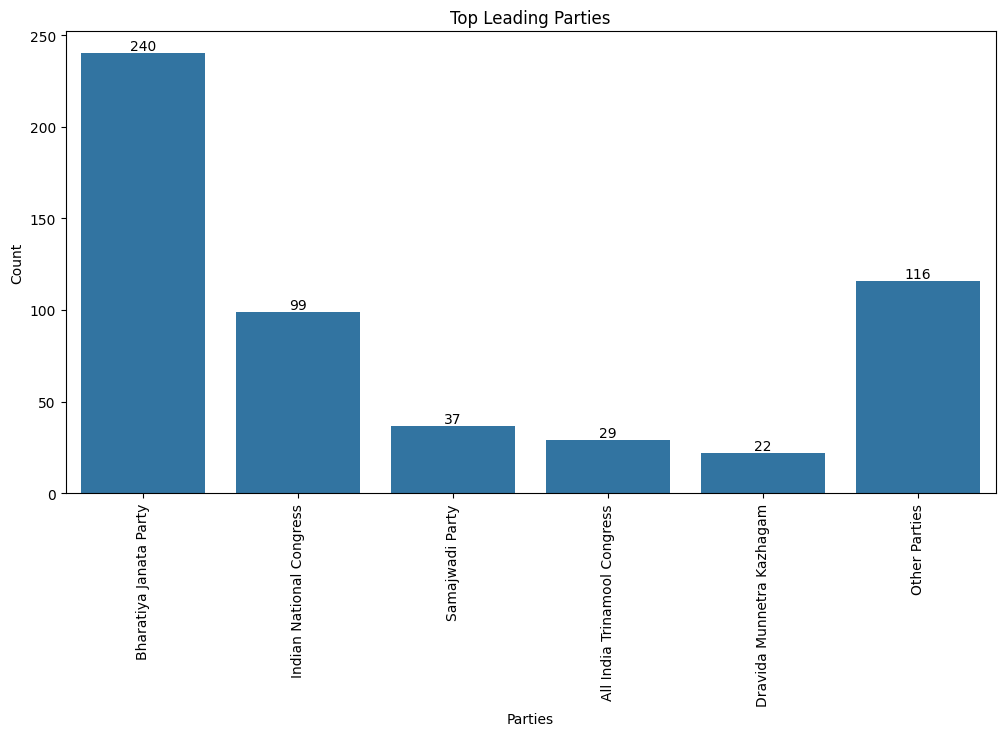

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=top_parties['Parties'],y=top_parties['Count'])
plt.xticks(rotation=90)
plt.title('Top Leading Parties')
plt.xlabel('Parties')
plt.ylabel('Count')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

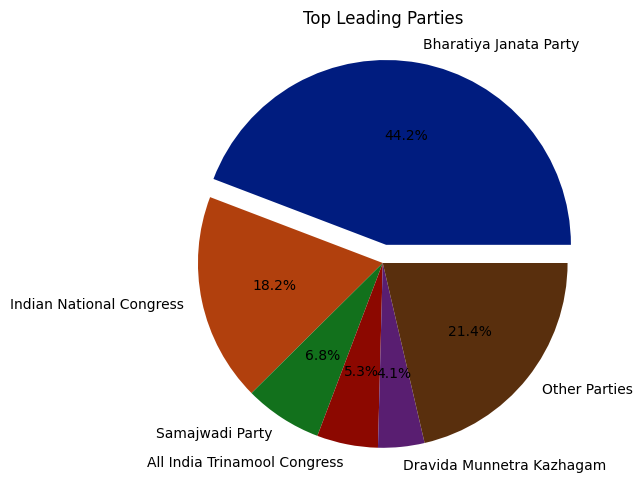

In [ ]:
plt.figure(figsize=(12,6))
ax=plt.pie(top_parties['Count'],labels=top_parties['Parties'],autopct='%1.1f%%',colors=sns.color_palette('dark'),explode=[0.1, 0, 0, 0, 0,0])
plt.title('Top Leading Parties')
plt.show()

In [ ]:
data['Constituency'].value_counts()

Constituency
Maharajganj        2
Aurangabad         2
NAGAUR             1
Munger             1
Murshidabad        1
                  ..
Fatehgarh Sahib    1
Farrukhabad        1
Faridkot           1
Faizabad           1
Zahirabad          1
Name: count, Length: 541, dtype: int64